<a href="https://colab.research.google.com/github/BrightmanMT/Pytorch-Tutorial-Youtube/blob/main/CustomerLifetimeValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER LIFE TIME VALUE PROJECT**

> Customer lifetime value is a measurement of how valuable a customer is to your company, not just on a purchase-by-purchase basis but across entire customer relationships

1. historic customer lifetime value: how much each existing customer has already spent with your brand

2. predictive customer lifetime value: how much customers could spend with your brand

**WHY IS CLV IMPORTANT TO BUSINESS?**
- *It helps you save money*: Focusing on increasing the current customer lifetime value of your existing customers is a great way to drive growth. Rather than relying on new customers (and spending lots to get them), you can figure out what keeps your customer base loyal and replicate your actions for increased value with existing customers.


- *It helps you spot and stop attrition:*  Let’s say you notice that customer lifetime value is dropping, and pinpoint that customers are neglecting to sign up for a continuation of an ongoing subscription of your product or service. You might decide to launch or improve a loyalty program to tempt customers back, or provide better customer support or marketing efforts around renewal times to help encourage customers to sign up again. This will help to increase customer lifetime value and business revenue again.


- *It helps you find your best customers and replicate them:* Your best customers will have a higher customer lifetime value, and through careful analysis you’ll be able to understand the commonalities between these individuals. What drives them to buy into your brand again and again? Is it a common need, a particular income bracket, a specific geographical location? You can define a whole customer segment based on these higher value existing customers alone.




In [72]:
import pandas as pd
import numpy as np

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
!ls '/content/drive/My Drive'


'Colab Notebooks'


In [75]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data.csv", encoding='ISO-8859-1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**Exploratory Data Analysis**

In [76]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [77]:
# unique customers we have

df['CustomerID'].nunique()

4372

In [78]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [79]:
df = df.dropna(subset=['CustomerID', 'Description'])
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [80]:
#Total number of cancelled orders
df['InvoiceNo'].astype(str).str.startswith('C').sum()

np.int64(8905)

In [81]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
df['InvoiceNo'].astype(str).str.startswith('C').sum()

np.int64(0)

In [82]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [83]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [84]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [85]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [86]:
df.info()
df.head()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   Revenue      392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


In [87]:
df['CustomerID'].nunique()

4338

In [88]:
#time range of transactions

df['InvoiceDate'].min(), df['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

**Data Visualization**

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')

/tmp/ipython-input-1596632822.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


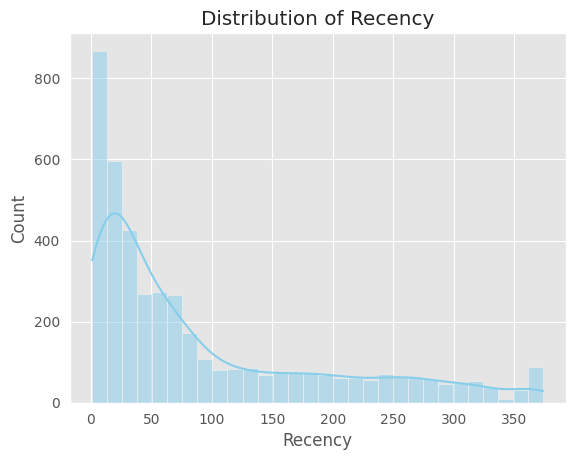

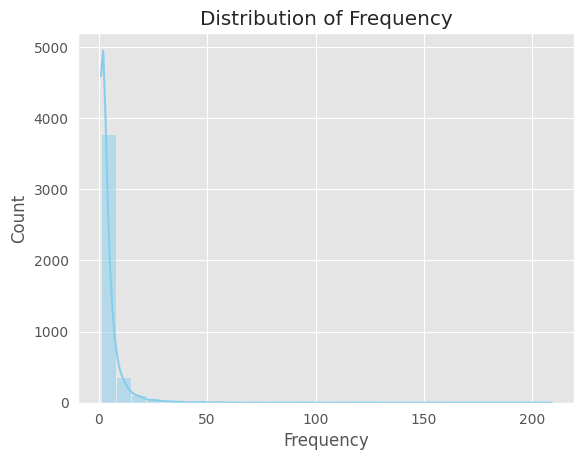

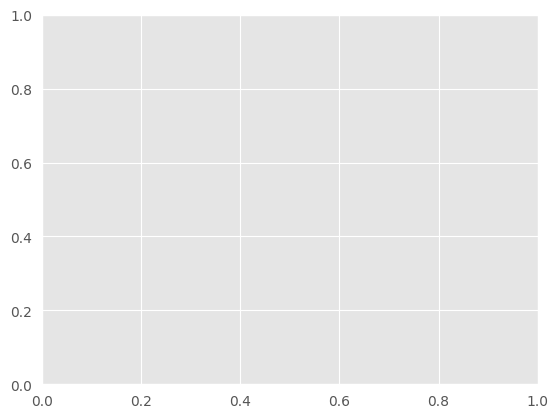

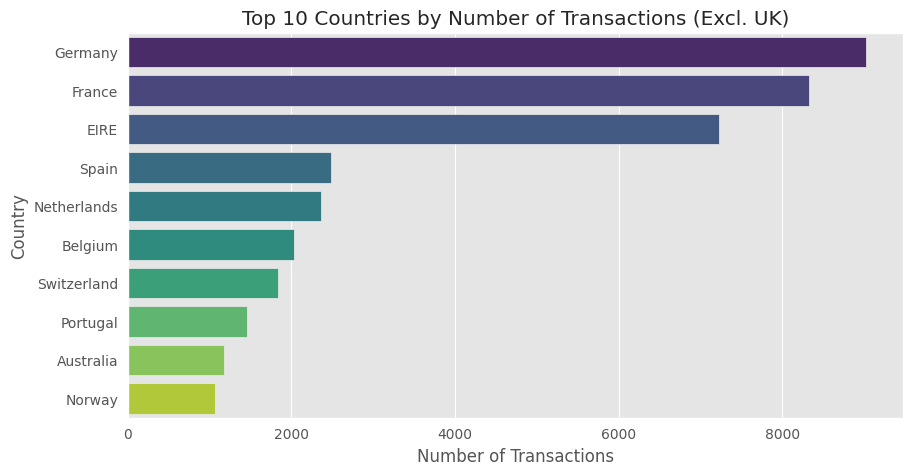

In [90]:
#Top 10 Countries by Number of Transactions

top_countries = df['Country'].value_counts().drop('United Kingdom').head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries by Number of Transactions (Excl. UK)")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show();

/tmp/ipython-input-1517000.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='magma')


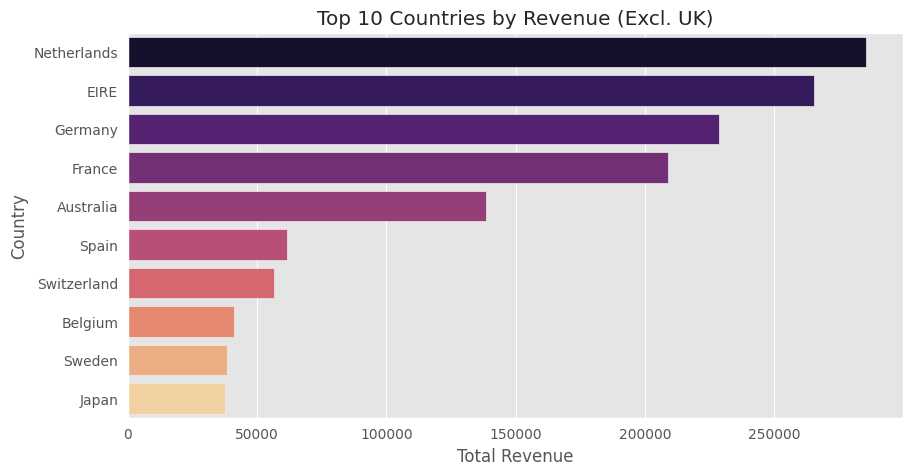

In [91]:
#Total Revenue by Country (Excluding UK)

country_revenue = df[df['Country'] != 'United Kingdom'].groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='magma')
plt.title("Top 10 Countries by Revenue (Excl. UK)")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-273516135.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')


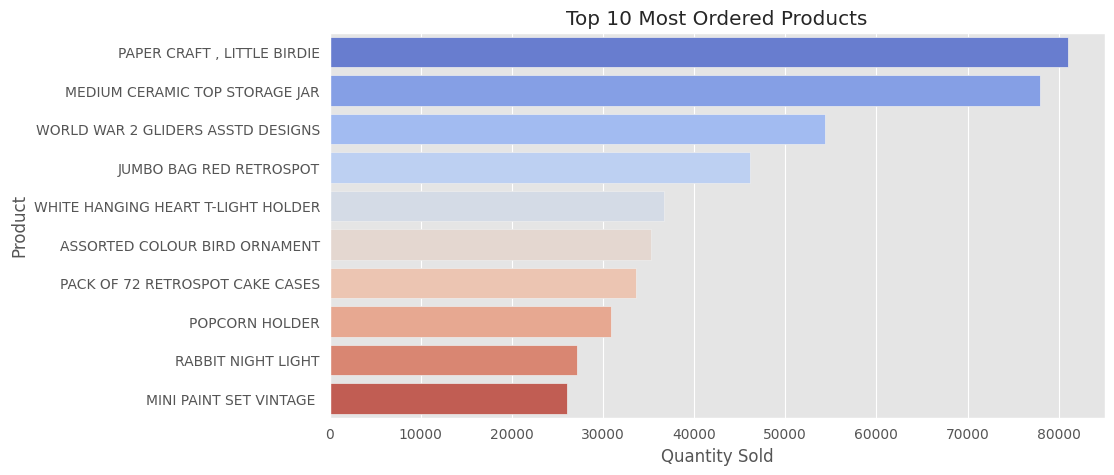

In [92]:
#Most Ordered Products

top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='coolwarm')
plt.title("Top 10 Most Ordered Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.show();

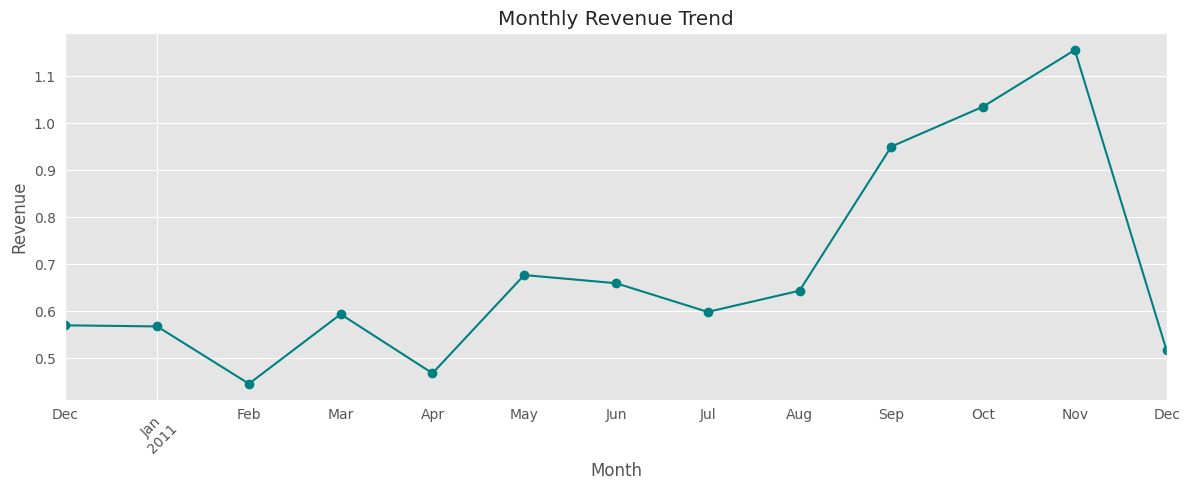

In [93]:
#Monthly Revenue Trend

df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Revenue'].sum()/1e6

plt.figure(figsize=(12,5))
monthly_revenue.plot(marker='o', color='teal')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

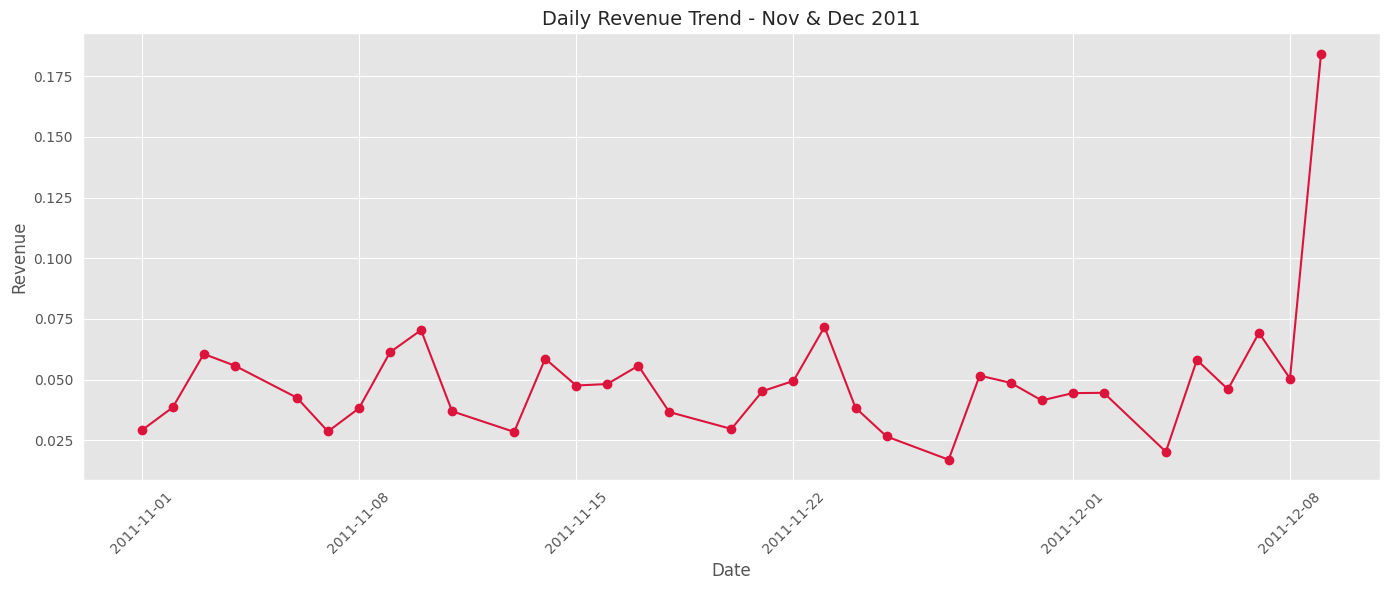

In [94]:
# Filter for November and December
nov_dec_df = df[(df['InvoiceDate'].dt.month.isin([11, 12])) &
                (df['InvoiceDate'].dt.year == 2011)]

# Group by day
daily_revenue = nov_dec_df.groupby(df['InvoiceDate'].dt.date)['Revenue'].sum()/1e6

# Plot
plt.figure(figsize=(14,6))
daily_revenue.plot(marker='o', color='crimson')
plt.title("Daily Revenue Trend - Nov & Dec 2011", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

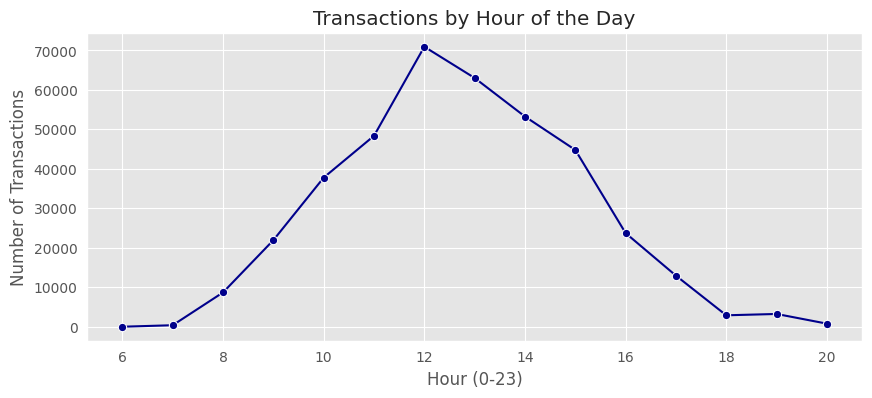

In [95]:
#Hour of Day with Highest Transactions

df['Hour'] = df['InvoiceDate'].dt.hour
hourly_txn = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(10,4))
sns.lineplot(x=hourly_txn.index, y=hourly_txn.values, marker='o', color='darkblue')
plt.title("Transactions by Hour of the Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()

In [96]:
df[df['Revenue'] <= 0]

df['Revenue'].describe()

,Revenue
count,392692.000000
mean,22.631500
std,311.099224
min,0.001000
25%,4.950000
50%,12.450000
75%,19.800000
max,168469.600000


 Why log-transformation?
Revenue data is typically right-skewed:
Most customers spend a little, and a few customers spend a lot.

Log-scaling compresses high values, spreads out the lower ones, and helps reveal patterns in the majority of the data that would otherwise be squished.



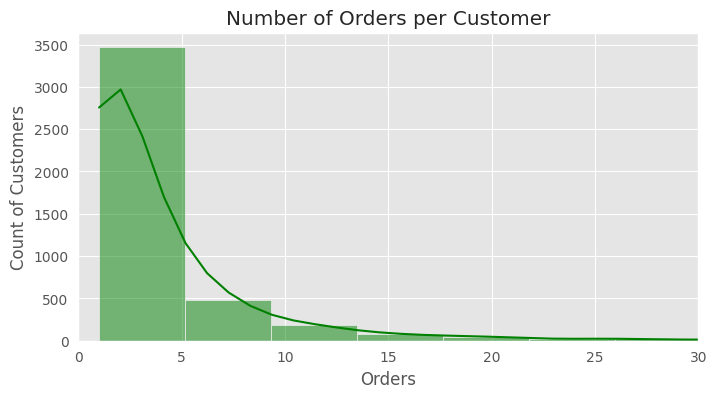

In [97]:
#Number of Orders Per Customer

orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(8,4))
sns.histplot(orders_per_customer, bins=50, kde=True, color='green')
plt.xlim(0, 30)
plt.title("Number of Orders per Customer")
plt.xlabel("Orders")
plt.ylabel("Count of Customers")
plt.show()


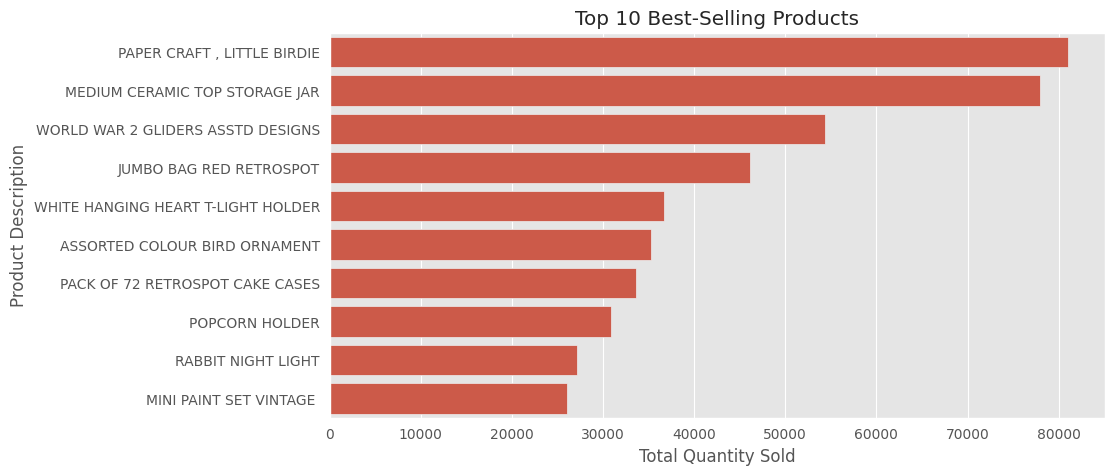

In [98]:
# Top-selling products

product_sales = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=product_sales.values, y=product_sales.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.show()

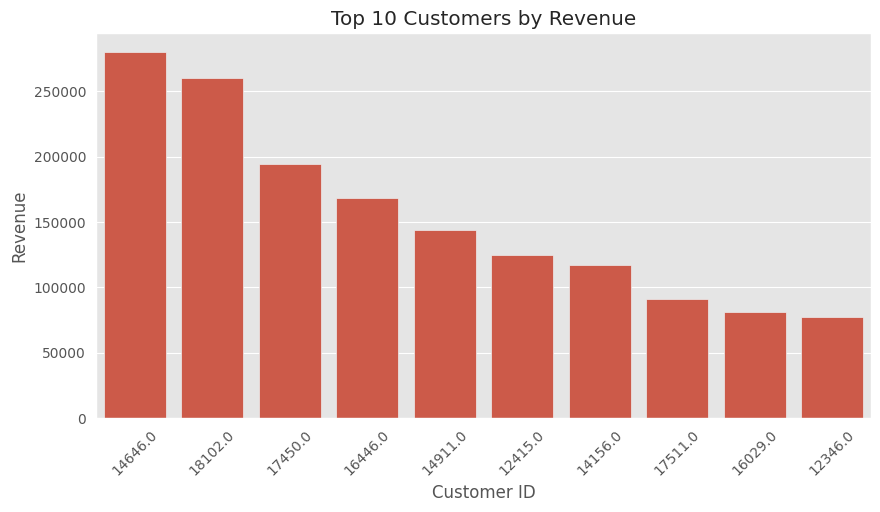

In [99]:
customer_revenue = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)



plt.figure(figsize=(10,5))
sns.barplot(x=customer_revenue.index.astype(str), y=customer_revenue.values)
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

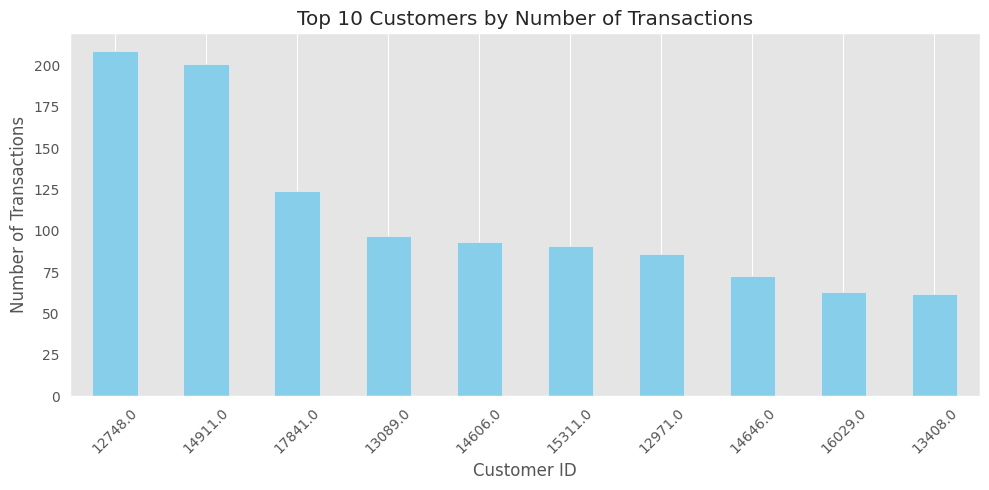

In [100]:
# Group by CustomerID and count unique InvoiceNo to get number of transactions
customer_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Get top 10 customers by number of transactions
top_transaction_customers = customer_transactions.sort_values(ascending=False).head(10)

# Plot the chart
top_transaction_customers.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title("Top 10 Customers by Number of Transactions")
plt.xlabel("Customer ID")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [101]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Month,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,8
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12,8
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12,8
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12,8
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12,8


Building our model

In [102]:
#Feature Engineering for CLV

import datetime as dt

# Latest date for recency calculation
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Compute metrics per customer
clv_data = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
}).reset_index()

clv_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
clv_data.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40
5,12352.0,36,8,2506.04
6,12353.0,204,1,89.00
7,12354.0,232,1,1079.40
8,12355.0,214,1,459.40
9,12356.0,23,3,2811.43


In [103]:

# Ensure InvoiceDate is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Add Revenue column if not already present
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Reference date (max InvoiceDate + 1)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Grouped customer data
clv_data = df.groupby('CustomerID').agg({
    'InvoiceDate': [lambda x: (reference_date - x.max()).days,      # Recency
                    lambda x: (x.max() - x.min()).days,             # Tenure
                    lambda x: (x.sort_values().diff().dropna().mean()).days],  # Recency Trend
    'InvoiceNo': 'nunique',                                         # Frequency
    'Revenue': 'sum',                                               # Monetary
})

# Flatten multi-level column names
clv_data.columns = ['Recency', 'Tenure', 'Avg_Days_Between_Purchases', 'Frequency', 'Monetary']
clv_data = clv_data.reset_index()

# Average Order Value
clv_data['AvgOrderValue'] = clv_data['Monetary'] / clv_data['Frequency']
clv_data.head()


,CustomerID,Recency,Tenure,Avg_Days_Between_Purchases,Frequency,Monetary,AvgOrderValue
0,12346.0,326,0,NaN,1,77183.60,77183.600000
1,12347.0,2,365,2.0,7,4310.00,615.714286
2,12348.0,75,282,9.0,4,1797.24,449.310000
3,12349.0,19,0,0.0,1,1757.55,1757.550000
4,12350.0,310,0,0.0,1,334.40,334.400000


In [104]:
Q1 = clv_data['Monetary'].quantile(0.25)
Q3 = clv_data['Monetary'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
df_no_outliers = clv_data[(clv_data['Monetary'] >= lower_bound) & (clv_data['Monetary'] <= upper_bound)]
df_no_outliers.head()

,CustomerID,Recency,Tenure,Avg_Days_Between_Purchases,Frequency,Monetary,AvgOrderValue
2,12348.0,75,282,9.0,4,1797.24,449.310
3,12349.0,19,0,0.0,1,1757.55,1757.550
4,12350.0,310,0,0.0,1,334.40,334.400
5,12352.0,36,260,3.0,8,2506.04,313.255
6,12353.0,204,0,0.0,1,89.00,89.000


In [105]:
#Linear regression is sensitive to scale, so we’ll normalize the data.

from sklearn.preprocessing import StandardScaler

features = ['Recency', 'Frequency', 'AvgOrderValue', 'Tenure']
scaler = StandardScaler()
clv_scaled = scaler.fit_transform(df_no_outliers[features])

# Create final DataFrame
X = pd.DataFrame(clv_scaled, columns=features)
y = df_no_outliers['Monetary']  # We can predict Monetary

In [106]:
y.describe()

,Monetary
count,3913.000000
mean,883.921910
std,827.868248
min,3.750000
25%,283.150000
50%,584.320000
75%,1244.590000
max,3683.860000


In [107]:
# Convert scaled array back to DataFrame for easy checking
scaled_df = pd.DataFrame(clv_scaled, columns=features)

# Print the mean and standard deviation of each column
print("Means after scaling:\n", scaled_df.mean())
print("\nStandard deviations after scaling:\n", scaled_df.std())

Means after scaling:
 Recency         -5.084385e-17
Frequency       -9.079258e-17
AvgOrderValue   -1.815852e-16
Tenure           6.991029e-17
dtype: float64

Standard deviations after scaling:
 Recency          1.000128
Frequency        1.000128
AvgOrderValue    1.000128
Tenure           1.000128
dtype: float64


In [108]:
X.head(20)

,Recency,Frequency,AvgOrderValue,Tenure
0,-0.245260,0.422461,0.486793,1.382520
1,-0.796421,-0.744426,5.572675,-0.913905
2,2.067651,-0.744426,0.040072,-0.913905
3,-0.629104,1.978309,-0.042131,1.203366
4,1.024381,-0.744426,-0.913939,-0.913905
5,1.299962,-0.744426,2.936316,-0.913905
6,1.122803,-0.744426,0.526019,-0.913905
7,-0.757052,0.033499,2.383282,1.545387
8,-0.963738,-0.355463,1.010527,0.299454
9,-0.471629,0.033499,2.189720,0.291311


In [109]:
len(y)

3913

In [110]:
#Splitting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(objective='reg:squarederror'),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()
}

# Results container
results = []

# Loop through models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "R^2 Score": round(r2, 4),
        "RMSE": round(rmse, 4)
    })

# Display Results
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by="R^2 Score", ascending=False)
print(results_df)

                      Model  R^2 Score      RMSE
5               Extra Trees     0.9983   32.5430
4             Random Forest     0.9975   39.8189
7                   XGBoost     0.9968   44.7223
3             Decision Tree     0.9958   51.2441
6         Gradient Boosting     0.9944   59.1444
8       K-Nearest Neighbors     0.9694  138.0477
2          Lasso Regression     0.8238  331.1131
0         Linear Regression     0.8237  331.1697
1          Ridge Regression     0.8237  331.1871
9  Support Vector Regressor     0.3393  641.1774


/tmp/ipython-input-4174425307.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2 Score", y="Model", data=df_results_sorted, palette="viridis")
/tmp/ipython-input-4174425307.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Model", data=df_results_sorted, palette="magma")


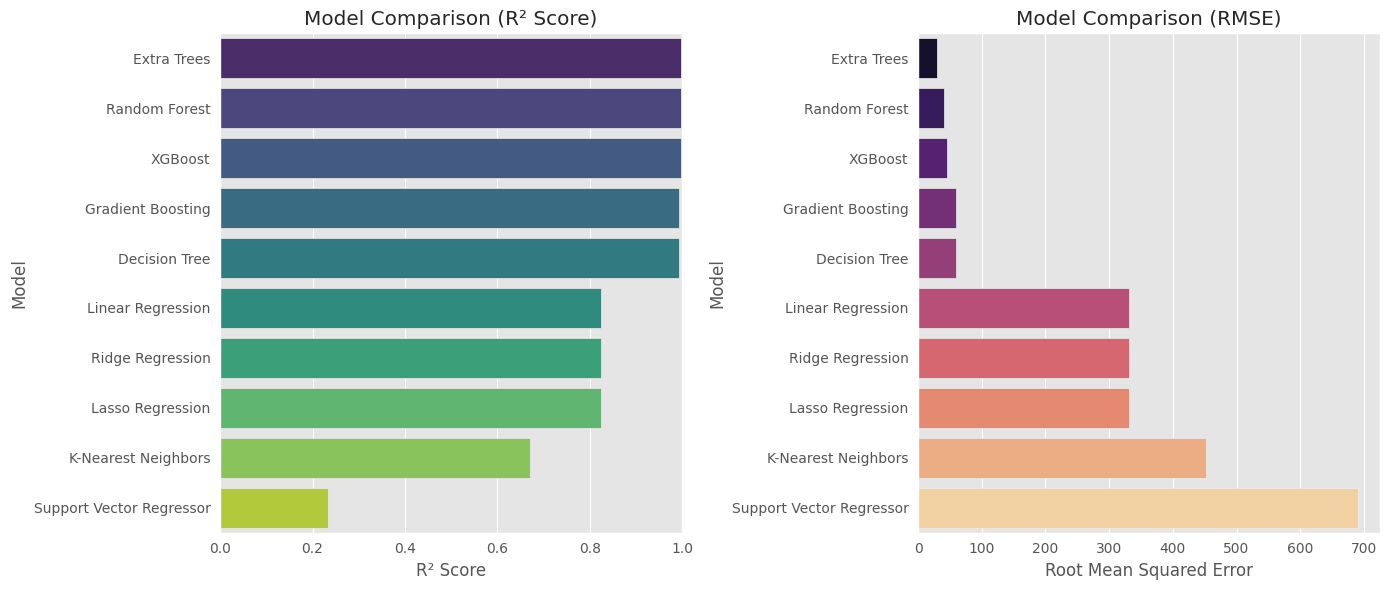

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your model performance data
data = {
    "Model": [
        "Linear Regression", "Ridge Regression", "Lasso Regression",
        "Decision Tree", "Random Forest", "Extra Trees",
        "Gradient Boosting", "XGBoost", "K-Nearest Neighbors",
        "Support Vector Regressor"
    ],
    "R2 Score": [
        0.8237, 0.8237, 0.8236,
        0.9943, 0.9973, 0.9986,
        0.9944, 0.9968, 0.6719,
        0.2330
    ],
    "RMSE": [
        331.1697, 331.1757, 331.2604,
        59.3210, 40.6179, 29.6433,
        59.1323, 44.7223, 451.8032,
        690.8075
    ]
}

df_results = pd.DataFrame(data)

# Sort by R2 Score
df_results_sorted = df_results.sort_values(by="R2 Score", ascending=False)

# Plot
plt.figure(figsize=(14, 6))

# R² Score
plt.subplot(1, 2, 1)
sns.barplot(x="R2 Score", y="Model", data=df_results_sorted, palette="viridis")
plt.title("Model Comparison (R² Score)")
plt.xlabel("R² Score")
plt.xlim(0, 1)

# RMSE
plt.subplot(1, 2, 2)
sns.barplot(x="RMSE", y="Model", data=df_results_sorted, palette="magma")
plt.title("Model Comparison (RMSE)")
plt.xlabel("Root Mean Squared Error")

plt.tight_layout()
plt.show()

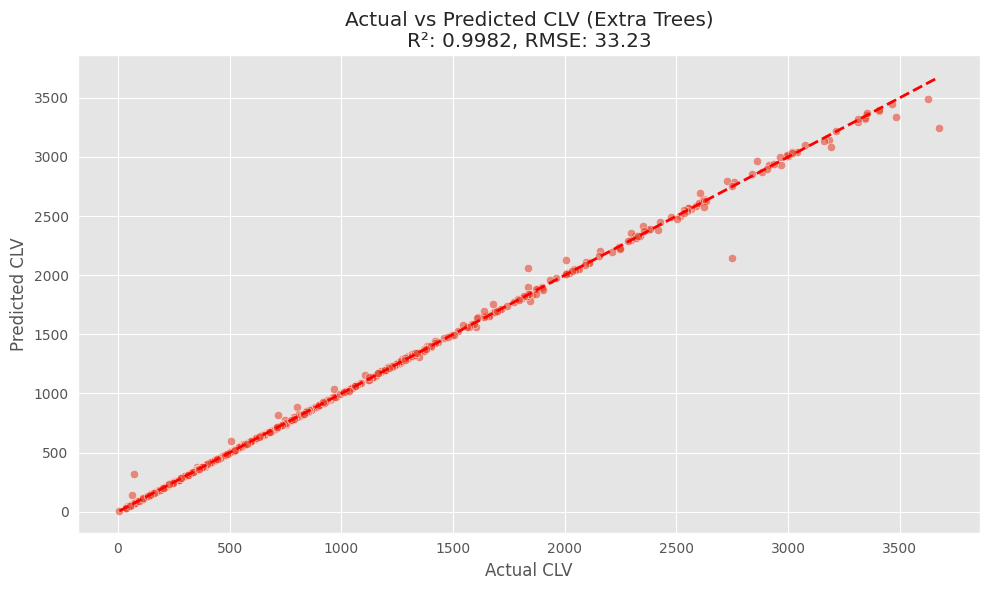

In [113]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train the Extra Trees model
extra_trees = ExtraTreesRegressor(random_state=42)
extra_trees.fit(X_train, y_train)

# Predict on the test set
y_pred_et = extra_trees.predict(X_test)

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_et, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title(f'Actual vs Predicted CLV (Extra Trees)\nR²: {r2_score(y_test, y_pred_et):.4f}, RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_et)):.2f}')
plt.grid(True)
plt.tight_layout()
plt.show()

**CHECKING FOR OVERFITTING**
1. compare train r**2 and test r**2
2. Use cross val score
3. residual values
4. checking feat import if the model is not dominated by two feat only

In [114]:
# R² scores
train_r2 = extra_trees.score(X_train, y_train)
test_r2 = extra_trees.score(X_test, y_test)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²:  {test_r2:.4f}")

Train R²: 1.0000
Test R²:  0.9982


In [115]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(extra_trees, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f}")

Cross-validation R² scores: [0.99719389 0.99566157 0.9960776  0.99707008 0.99731576]
Mean CV R²: 0.9967


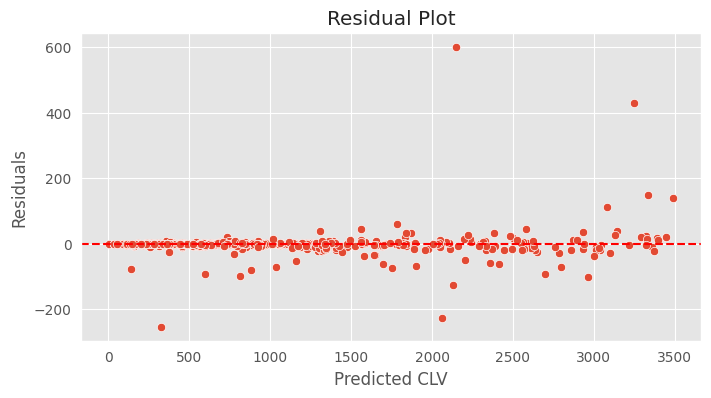

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = extra_trees.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CLV")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

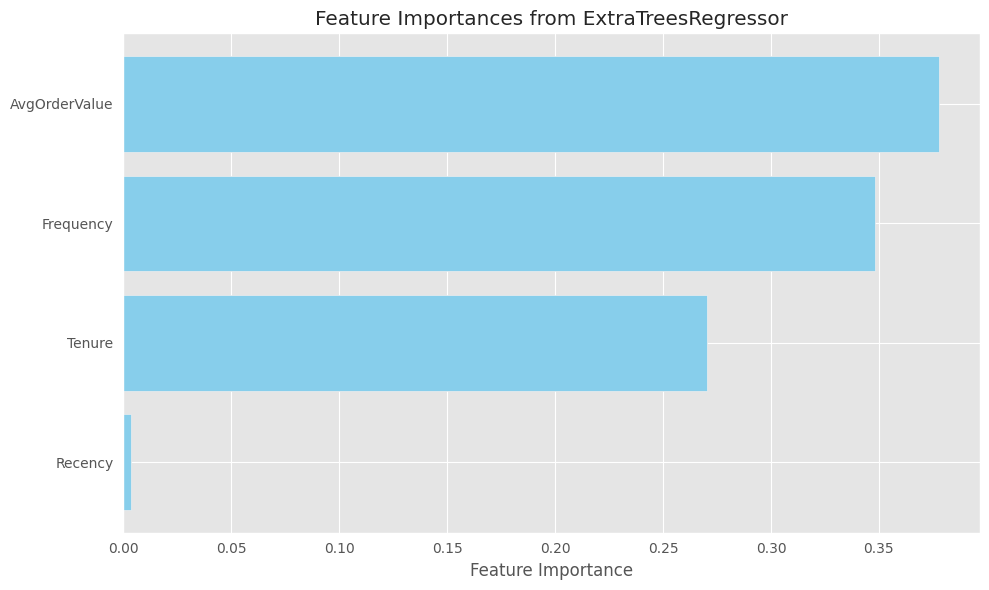

In [117]:
# Get feature importances
importances = extra_trees.feature_importances_
features = X_train.columns  # or your feature list

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Most important on top
plt.xlabel("Feature Importance")
plt.title("Feature Importances from ExtraTreesRegressor")
plt.tight_layout()
plt.show()

In [118]:
df_no_outliers.head()

,CustomerID,Recency,Tenure,Avg_Days_Between_Purchases,Frequency,Monetary,AvgOrderValue
2,12348.0,75,282,9.0,4,1797.24,449.310
3,12349.0,19,0,0.0,1,1757.55,1757.550
4,12350.0,310,0,0.0,1,334.40,334.400
5,12352.0,36,260,3.0,8,2506.04,313.255
6,12353.0,204,0,0.0,1,89.00,89.000


In [119]:
# 6. Finally, calculate CLV
clv_data['CLV'] = clv_data['AvgOrderValue'] * clv_data['Frequency'] * clv_data['Tenure']
clv_data.head(20)

,CustomerID,Recency,Tenure,Avg_Days_Between_Purchases,Frequency,Monetary,AvgOrderValue,CLV
0,12346.0,326,0,NaN,1,77183.60,77183.600000,0.00
1,12347.0,2,365,2.0,7,4310.00,615.714286,1573150.00
2,12348.0,75,282,9.0,4,1797.24,449.310000,506821.68
3,12349.0,19,0,0.0,1,1757.55,1757.550000,0.00
4,12350.0,310,0,0.0,1,334.40,334.400000,0.00
5,12352.0,36,260,3.0,8,2506.04,313.255000,651570.40
6,12353.0,204,0,0.0,1,89.00,89.000000,0.00
7,12354.0,232,0,0.0,1,1079.40,1079.400000,0.00
8,12355.0,214,0,0.0,1,459.40,459.400000,0.00
9,12356.0,23,302,5.0,3,2811.43,937.143333,849051.86


In [120]:
# Reference date (max InvoiceDate + 1)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Grouped customer data
clv_data = df.groupby('CustomerID').agg({
    'InvoiceDate': [
        lambda x: (reference_date - x.max()).days,                          # Recency in days
        lambda x: max((x.max() - x.min()).days / 7, 1),                    # Tenure in weeks, min 1
        lambda x: (x.sort_values().diff().dropna().mean()).days            # Avg days between purchases
    ],
    'InvoiceNo': 'nunique',                                               # Frequency
    'Revenue': 'sum',                                                     # Monetary
})

# Flatten multi-level column names
clv_data.columns = ['Recency', 'Tenure_Weeks', 'Avg_Days_Between_Purchases', 'Frequency', 'Monetary']
clv_data = clv_data.reset_index()

# Average Order Value
clv_data['AvgOrderValue'] = clv_data['Monetary'] / clv_data['Frequency']

# Optional: Calculate CLV
clv_data['CLV'] = clv_data['AvgOrderValue'] * clv_data['Frequency'] * clv_data['Tenure_Weeks']

clv_data.head()


,CustomerID,Recency,Tenure_Weeks,Avg_Days_Between_Purchases,Frequency,Monetary,AvgOrderValue,CLV
0,12346.0,326,1.000000,NaN,1,77183.60,77183.600000,77183.600000
1,12347.0,2,52.142857,2.0,7,4310.00,615.714286,224735.714286
2,12348.0,75,40.285714,9.0,4,1797.24,449.310000,72403.097143
3,12349.0,19,1.000000,0.0,1,1757.55,1757.550000,1757.550000
4,12350.0,310,1.000000,0.0,1,334.40,334.400000,334.400000


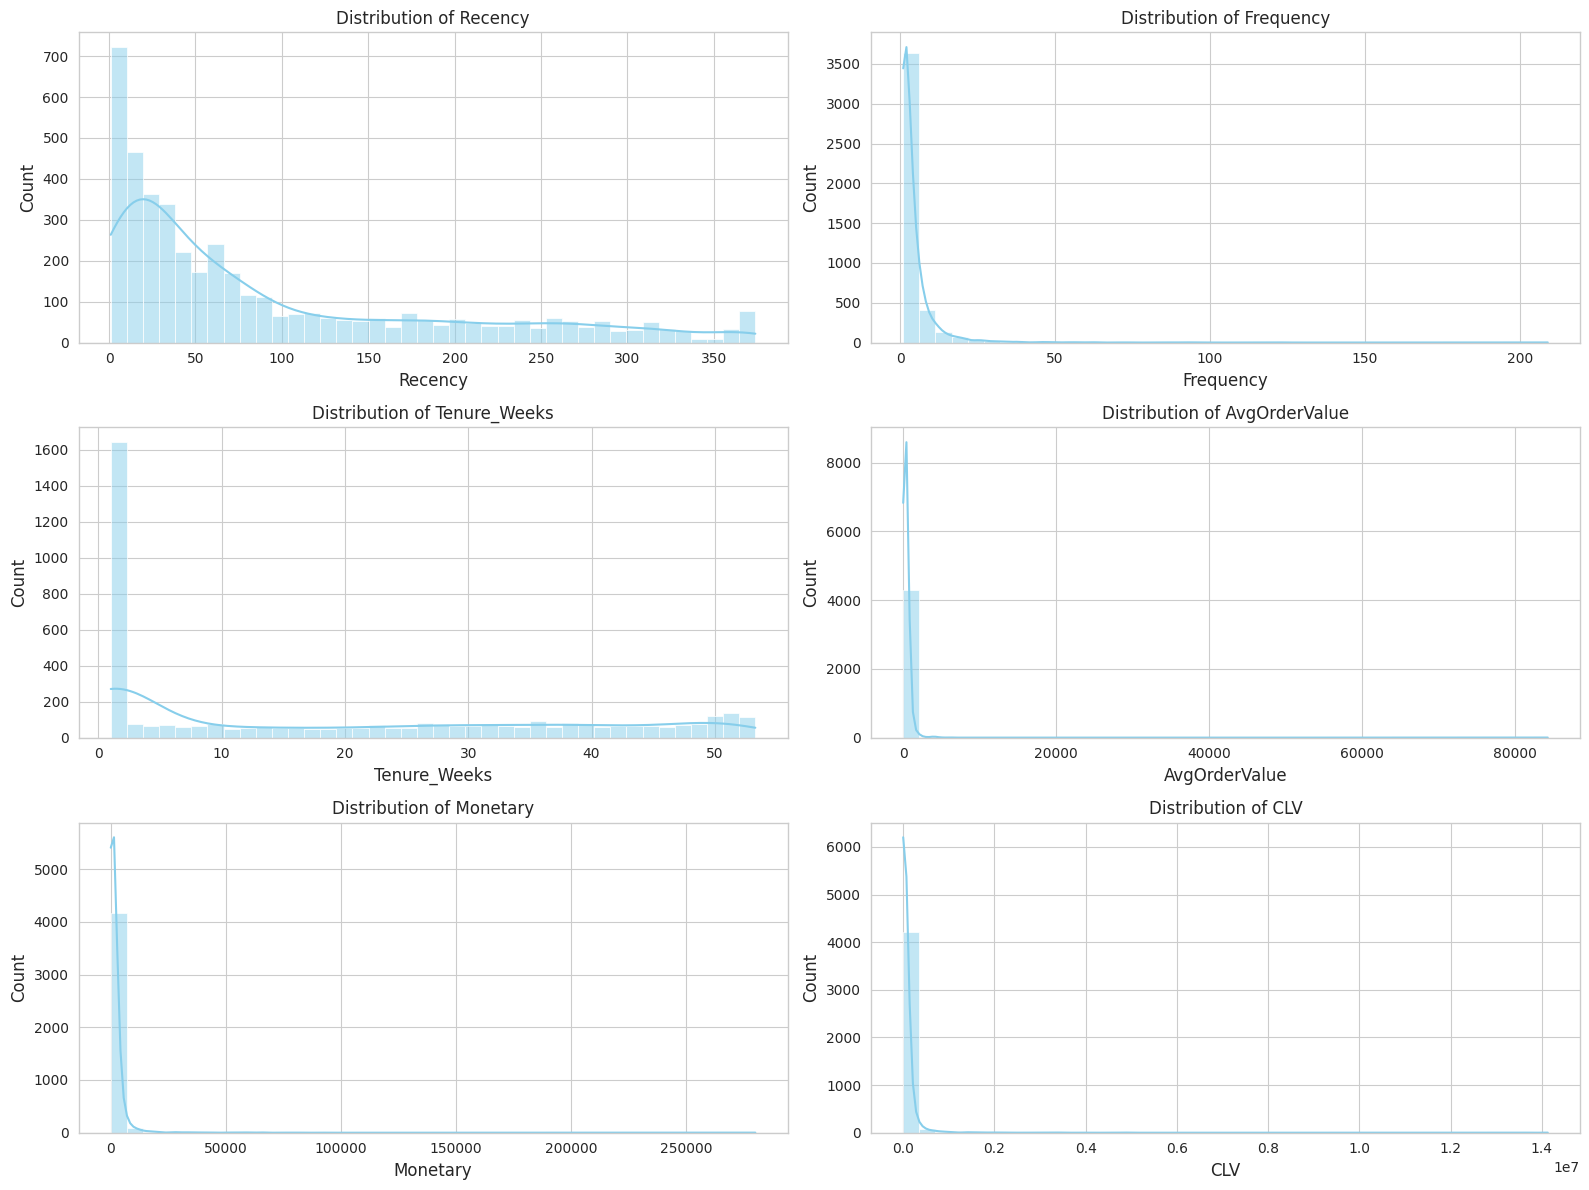

In [121]:
# Set Seaborn style
sns.set_style("whitegrid")

# Select columns to visualize
cols = ['Recency', 'Frequency', 'Tenure_Weeks', 'AvgOrderValue', 'Monetary', 'CLV']

# Create subplots
plt.figure(figsize=(16, 12))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(clv_data[col], kde=True, bins=40, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


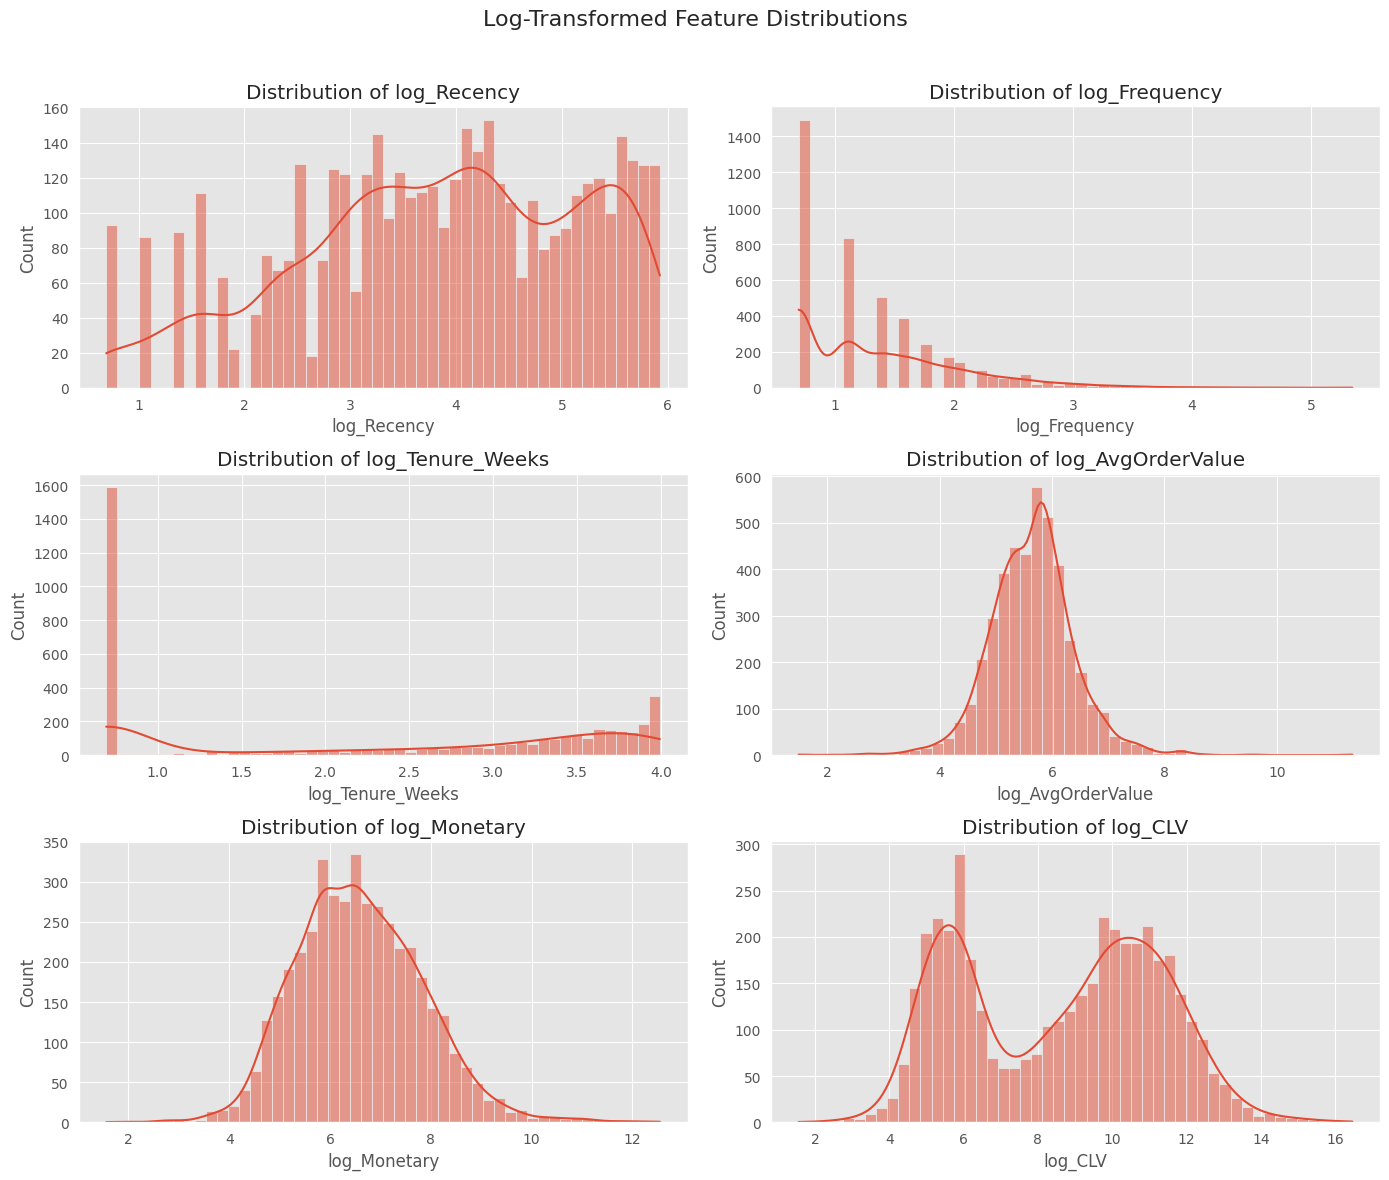

In [144]:
# Copy the data to avoid modifying the original
log_clv_data = clv_data.copy()

# Apply log1p transformation to reduce skewness
log_clv_data['log_Recency'] = np.log1p(log_clv_data['Recency'])
log_clv_data['log_Frequency'] = np.log1p(log_clv_data['Frequency'])
log_clv_data['log_Tenure_Weeks'] = np.log1p(log_clv_data['Tenure_Weeks'])
log_clv_data['log_AvgOrderValue'] = np.log1p(log_clv_data['AvgOrderValue'])
log_clv_data['log_Monetary'] = np.log1p(log_clv_data['Monetary'])
log_clv_data['log_CLV'] = np.log1p(log_clv_data['CLV'])

# Plot the distributions
plt.style.use('ggplot')
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Log-Transformed Feature Distributions", fontsize=16)

sns.histplot(log_clv_data['log_Recency'], bins=50, kde=True, ax=axes[0,0])
axes[0,0].set_title("Distribution of log_Recency")

sns.histplot(log_clv_data['log_Frequency'], bins=50, kde=True, ax=axes[0,1])
axes[0,1].set_title("Distribution of log_Frequency")

sns.histplot(log_clv_data['log_Tenure_Weeks'], bins=50, kde=True, ax=axes[1,0])
axes[1,0].set_title("Distribution of log_Tenure_Weeks")

sns.histplot(log_clv_data['log_AvgOrderValue'], bins=50, kde=True, ax=axes[1,1])
axes[1,1].set_title("Distribution of log_AvgOrderValue")

sns.histplot(log_clv_data['log_Monetary'], bins=50, kde=True, ax=axes[2,0])
axes[2,0].set_title("Distribution of log_Monetary")

sns.histplot(log_clv_data['log_CLV'], bins=50, kde=True, ax=axes[2,1])
axes[2,1].set_title("Distribution of log_CLV")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [123]:
# Interaction terms
log_clv_data['log_Frequency_Tenure'] = log_clv_data['log_Frequency'] * log_clv_data['log_Tenure_Weeks']
log_clv_data['log_Recency_Tenure'] = log_clv_data['log_Recency'] * log_clv_data['log_Tenure_Weeks']
log_clv_data['log_Frequency_AvgOrder'] = log_clv_data['log_Frequency'] * log_clv_data['log_AvgOrderValue']


In [124]:
# Value per day/week of tenure
log_clv_data['log_ValuePerWeek'] = log_clv_data['log_CLV'] / (log_clv_data['log_Tenure_Weeks'] + 1)

# Frequency per week
log_clv_data['log_FreqPerWeek'] = log_clv_data['log_Frequency'] / (log_clv_data['log_Tenure_Weeks'] + 1)

In [125]:
features = log_clv_data[[
    'log_Recency',
    'log_Frequency',
    'log_AvgOrderValue',
    'log_Tenure_Weeks',
    'log_Frequency_Tenure',
    'log_Recency_Tenure',
    'log_Frequency_AvgOrder',
    'log_ValuePerWeek',
    'log_FreqPerWeek'
]]

target = log_clv_data['log_CLV']

In [126]:
# Sanity check
print(features.isnull().sum())
print(target.isnull().sum())

log_Recency               0
log_Frequency             0
log_AvgOrderValue         0
log_Tenure_Weeks          0
log_Frequency_Tenure      0
log_Recency_Tenure        0
log_Frequency_AvgOrder    0
log_ValuePerWeek          0
log_FreqPerWeek           0
dtype: int64
0


In [127]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

# Train Extra Trees Regressor
final_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Predict
y_pred = final_model.predict(X_test)

# Evaluation Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print Results
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

R² Score: 0.9993
RMSE: 0.0714
MAE: 0.0243


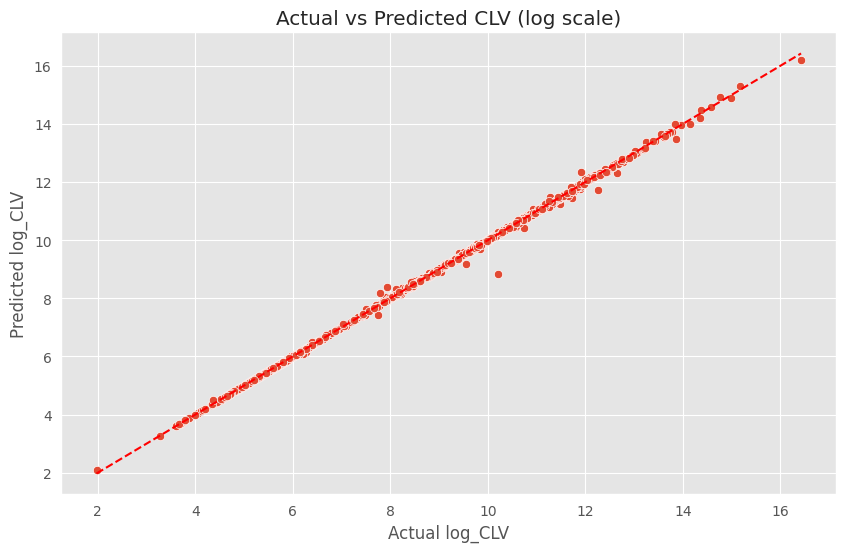

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual log_CLV")
plt.ylabel("Predicted log_CLV")
plt.title("Actual vs Predicted CLV (log scale)")
plt.grid(True)
plt.show()

In [129]:
train_r2 = final_model.score(X_train, y_train)
test_r2 = final_model.score(X_test, y_test)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²:  {test_r2:.4f}")

Train R²: 1.0000
Test R²:  0.9993


In [130]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(final_model, features, target, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

Cross-validation R² scores: [0.99840847 0.99973755 0.99950702 0.99738436 0.99934673]
Mean CV R²: 0.9988768262355796


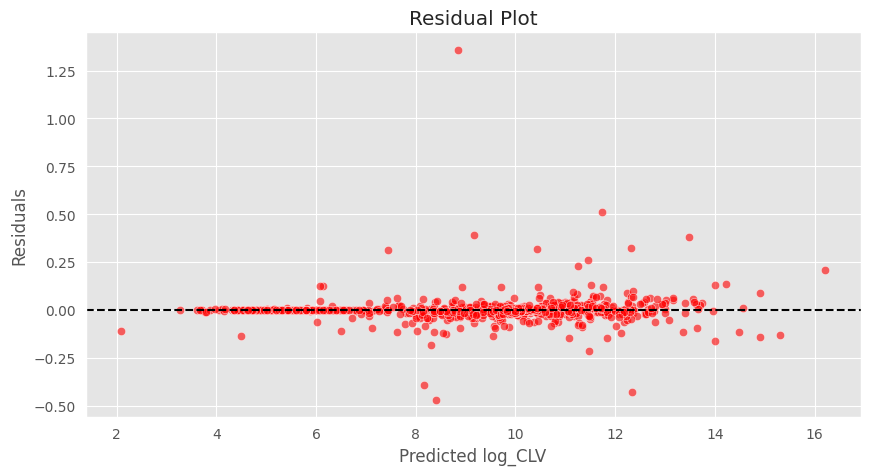

In [131]:
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_pred, y=residuals, color="red", alpha=0.6)
plt.axhline(0, linestyle='--', color='black')
plt.xlabel("Predicted log_CLV")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

/tmp/ipython-input-4126117311.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importances, palette="Blues_r")


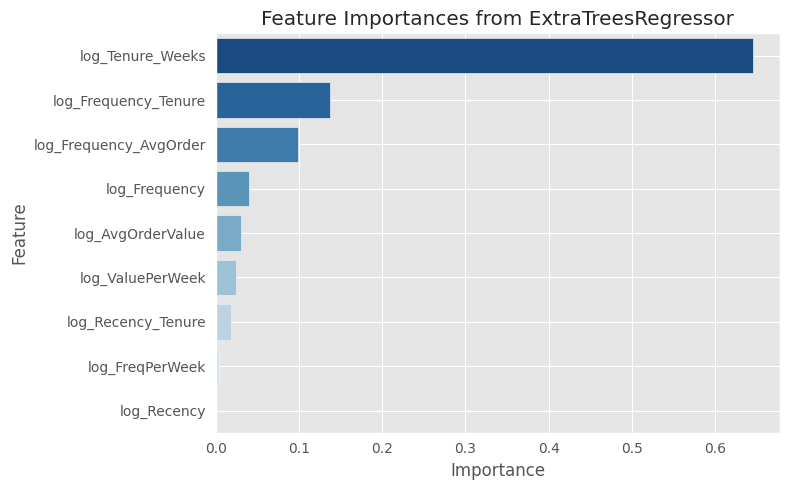

In [132]:
import pandas as pd

feat_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_importances, palette="Blues_r")
plt.title("Feature Importances from ExtraTreesRegressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

In [133]:
import joblib
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']

In [134]:
!pip install streamlit -q
!pip install pyngrok -q

In [141]:
%%writefile streamlit_app.py
import streamlit as st
import joblib
import numpy as np

# Load model
model = joblib.load("final_model.pkl")

st.title("Customer Lifetime Value (CLV) Prediction")

# Raw user inputs
recency = st.number_input("Recency (in days)", min_value=0.0)
frequency = st.number_input("Frequency (number of transactions)", min_value=0.0)
avg_order_value = st.number_input("Average Order Value", min_value=0.0)
tenure_weeks = st.number_input("Tenure (in weeks)", min_value=0.01)  # avoid divide by zero

# Derived features
frequency_tenure = frequency / tenure_weeks
recency_tenure = recency / tenure_weeks
frequency_avg_order = frequency * avg_order_value
value_per_week = avg_order_value / tenure_weeks
freq_per_week = frequency / tenure_weeks

# Log transformation
input_features = np.log1p([
    recency,
    frequency,
    avg_order_value,
    tenure_weeks,
    frequency_tenure,
    recency_tenure,
    frequency_avg_order,
    value_per_week,
    freq_per_week
]).reshape(1, -1)

# Prediction
prediction_log = model.predict(input_features)[0]
prediction_clv = np.expm1(prediction_log)  # reverse the log1p to get actual CLV

# Output
st.subheader(f"Predicted CLV: ${prediction_clv:.2f}")

Overwriting streamlit_app.py


In [142]:
from pyngrok import ngrok

# Replace this with your actual authtoken
!ngrok config add-authtoken 30pF2NQGPqF4cXcgR9C0V53nvn0_2XP7SJ2L1WVtmL3CAPD9s

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [143]:
# Start Streamlit silently in the background
!streamlit run streamlit_app.py &> /dev/null &

# Connect ngrok to localhost:8501
from pyngrok import ngrok
public_url = ngrok.connect("http://localhost:8501")
print(f"Streamlit app running at: {public_url}")

Streamlit app running at: NgrokTunnel: "https://9e6f7c3b8347.ngrok-free.app" -> "http://localhost:8501"


**WHY ExtraTreesRegressor OUTPERFORMS ALL OTHER ALGO**

ExtraTreesRegressor: It is a an ensambling ml algo that uses collection of decision trees to peerfom regresssion tasks .....
- reduce overfit
- increase perfomance
- it picks splits randomly, does not search best fit
- increase diversity in trees